# Análisis Exploratorio de Datos

In [153]:
# Se importan los módulos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
# Se lee el dataset
data = pd.read_csv('data/winequality-red.csv')

# Se muestran 5 instancias aleatorias del dataframe
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1564,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
694,9.0,0.470,0.31,2.7,0.084,24.0,125.0,0.99840,3.31,0.61,9.4,5
1144,7.3,0.320,0.23,2.3,0.066,35.0,70.0,0.99588,3.43,0.62,10.1,5
1120,7.9,0.540,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8
174,7.3,0.380,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5


In [155]:
# Se revisa si existen valores NaN en el dataframe
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [156]:
# Se muestran algunas estadísticas
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


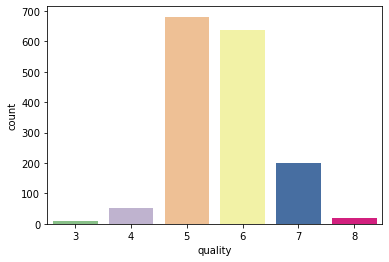

In [157]:
# Se crea una gráfica de barras de la variable 'quality'
sns.countplot(x='quality', palette='Accent', data=data)

# Se plotea
plt.show()

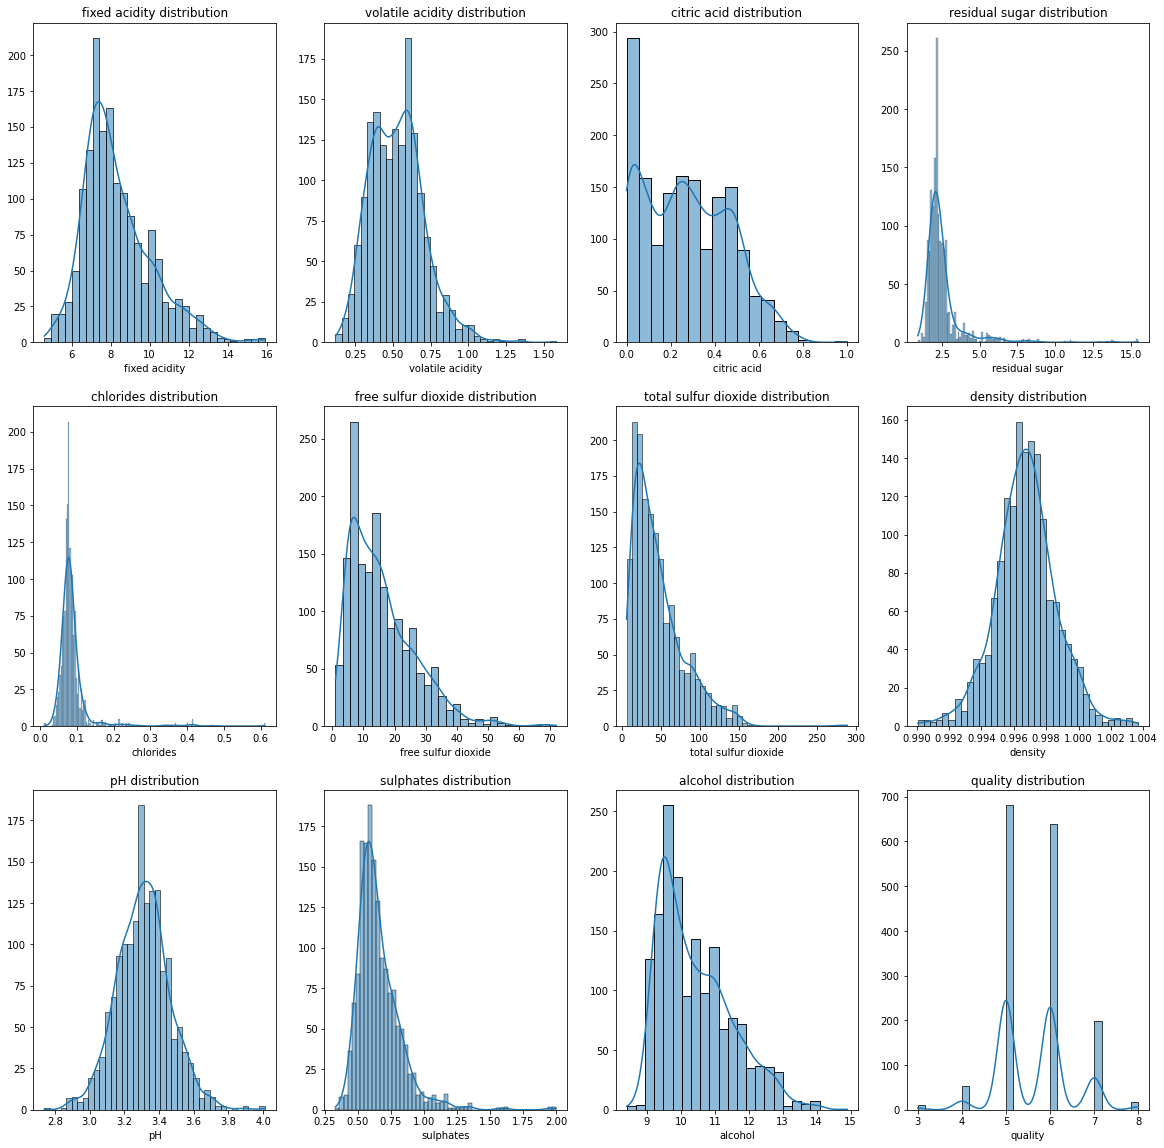

In [158]:
# Se obtiene una lista de todas las características del dataframe (columnas)
graphs = data.columns.to_list()

# Se crea el espacio vacio para las gráficas
fig , ax = plt.subplots(3, 4, figsize=(20, 20))

# Se crea un ciclo for para graficar todas las características
for current_idx, graph in enumerate(graphs):
    
    # Se crea el indice i
    i = current_idx // 4
    
    # Se crea el indice j
    j = current_idx % 4
    
    # Se crea el histograma
    sns.histplot(x=graph, ax=ax[i][j], kde=True, data=data)
    
    # Se establecen los títulos
    ax[i][j].set_title(graph + ' distribution')
    ax[i][j].set_ylabel('')
    
# Se plotea
plt.show()

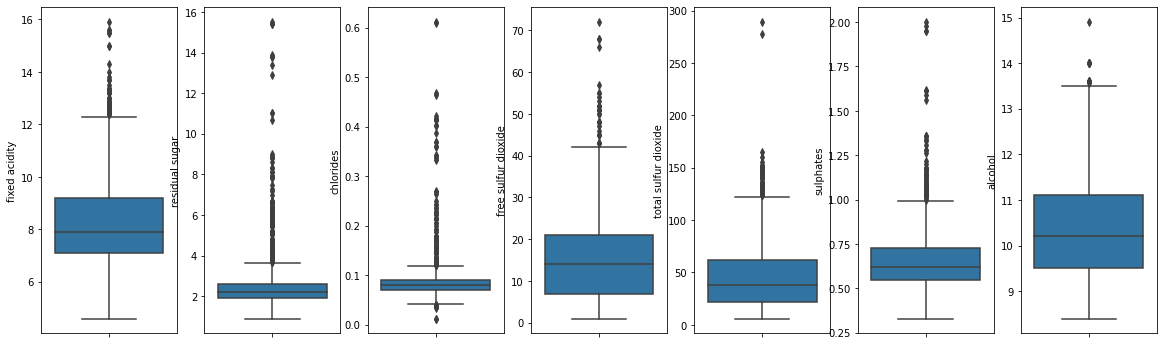

In [159]:
# Se crea la variable 'box_variables' con las características a plotear
box_variables = ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','sulphates', 'alcohol']

# Se crea el espacio de las figuras
fig, ax = plt.subplots(1, 7, figsize=(20, 6))

# Se realiza un for para graficar
for current_idx, graph in enumerate(box_variables):
    
    # Se grafica
    sns.boxplot(y=graph, data=data, ax=ax[current_idx])
    
# Se plotea todo
plt.show()

#### Debido a que quality es de tipo categórico es difícil observar una relación en la gráfica de dispersión

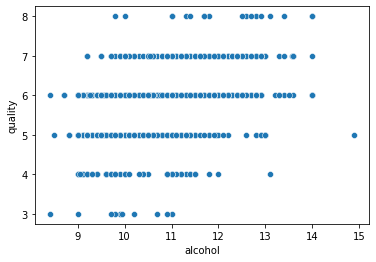

In [160]:
# Se crea una gráfica de dispersión entre la característica alcohol y quality
sns.scatterplot(x='alcohol', y='quality', data=data)

# Se plotea
plt.show()

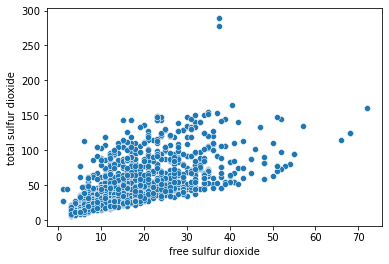

In [161]:
# Se crea una gráfica de dispersión entre la característica 'free sulfur dioxide' y 'total sulfur dioxide'
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', data=data)

# Se plotea
plt.show()

In [162]:
# Se guarda la correlación del dataset en la variable correlation
correlation = data.corr(method='pearson')

# Se muestran los primeros valores
correlation.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907


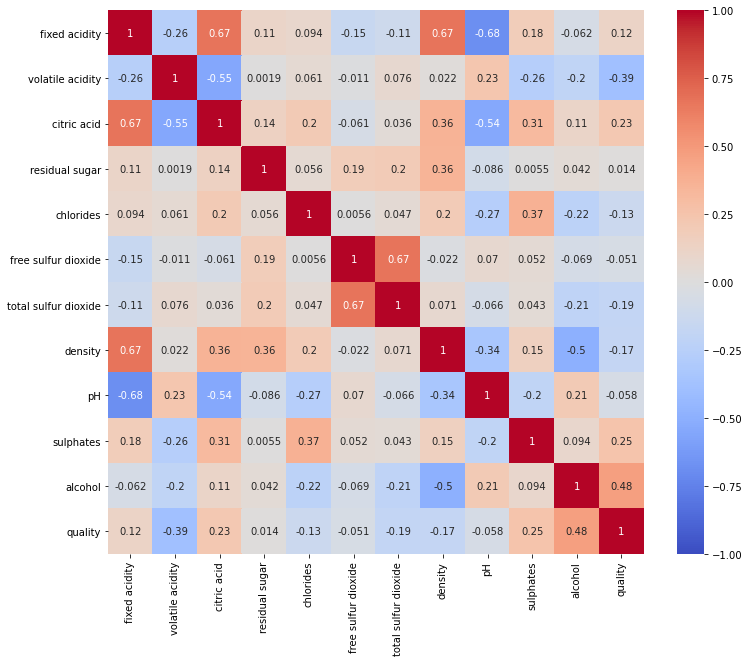

In [163]:
# Se establece el tamaño de la matriz de corrrelación 
plt.figure(figsize=(12, 10))

# Se crea la matriz de correlación
sns.heatmap(data=correlation, vmin=-1, cmap='coolwarm', annot=True)

# Se plotea
plt.show()

## Ingeniería de Características

In [164]:
# Se establecen los nuevos valores de quality en base a los criterios siguientes donde 1 = 'malo', 2 = 'medio', 3 = 'bueno':
data.loc[data['quality'] <= 4, 'quality'] = 1
data.loc[(data['quality'] > 4) & (data['quality'] <= 7), 'quality'] = 2
data.loc[data['quality'] == 8, 'quality'] = 3

In [165]:
# Se muestran cuentos valores hay por categoría (1, 2, 3)
data['quality'].value_counts()

2    1518
1      63
3      18
Name: quality, dtype: int64

In [166]:
# El nuevo dataset es guardado en un archivo csv
data.to_csv('data/clean_winequality_red.csv', index=False)

## Conclusión
Segun la fuente original del conjunto de datos, el dataset cuenta con un rango de 'calidad (quality)' de 0 a 10. Sin embargo, gracias al EDA se puede observar muy fácilmente
que el valor mínimo es 3 y el valor máximo es 8 por tal motivo se establecieron nuevas categorías (1, 2, 3) donde 1 = mala calidad, 2 = media calidad y 3 = buena calidad. Así mismo, gracias a la matriz de correlación se puede observar que hay una relación entre las características 'fixed acidity', 'ph' y 'density' por mencionar algunas.